In [21]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn import preprocessing
#from statsmodels.api import datasets
from sklearn import datasets ## Get dataset from sklearn
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.random as nr


In [47]:
data1 = pd.read_csv('train_values_oAriVNN.csv')
Labels1 = np.array(pd.read_csv('train_labels.csv'))
Labels=Labels1[:, [1]]
Labels = Labels.reshape(Labels.shape[0],)
print(data1.shape)
print(Labels.shape)

(2546, 48)
(2546,)


In [48]:
data=data1.fillna(value=0)
print(data.shape)

(2546, 48)


In [49]:
data.drop(["row_id","county_code","state"], axis=1, inplace=True)
data.head()

,year,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,...,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k
0,b,45009.0,6944.0,37.218,643.0,33315.0,98494.0,33.389,0.412070,0.493459,...,1960.0,0.532,0.252,0.153,0.233000,0.375000,0.278000,0.114000,12.915129,11.205112
1,a,9872.0,1224.0,31.773,517.0,43724.0,85444.0,26.477,0.838682,0.015588,...,890.0,0.509,0.252,0.188,0.073293,0.397590,0.331325,0.197791,11.049159,12.276843
2,b,17625.0,1725.0,21.973,671.0,37777.0,136162.0,32.500,0.873733,0.041040,...,3509.0,0.451,0.166,0.189,0.206587,0.303393,0.301397,0.188623,7.903576,10.161741
3,a,134136.0,18180.0,36.809,603.0,30607.0,70062.0,31.959,0.264083,0.240836,...,2219.0,0.519,0.263,0.125,0.248255,0.334995,0.290130,0.126620,13.137119,10.202072
4,a,6936.0,551.0,17.627,668.0,44237.0,187066.0,29.339,0.924502,0.005146,...,3410.0,0.487,0.196,0.203,0.058648,0.276342,0.413519,0.251491,6.084752,5.939877


In [50]:
print(data['rucc'].unique())
Features_o = data['rucc']
enc = preprocessing.LabelEncoder()
enc.fit(Features_o)
Features_o = enc.transform(Features_o)
print(Features_o)

['Nonmetro - Urban population of 20,000 or more, adjacent to a metro area'
 'Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area'
 'Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area'
 'Metro - Counties in metro areas of 250,000 to 1 million population'
 'Metro - Counties in metro areas of 1 million population or more'
 'Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area'
 'Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area'
 'Metro - Counties in metro areas of fewer than 250,000 population'
 'Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area']
[7 5 3 ... 2 5 1]


In [51]:
ohe = preprocessing.OneHotEncoder()
encoded = ohe.fit(Features_o.reshape(-1,1))
Features_o = encoded.transform(Features_o.reshape(-1,1)).toarray()
Features_o[:10,:]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.]])

In [52]:
def encode_string(cat_feature):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_feature.reshape(-1,1))
    return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()
    

categorical_columns = ['urban_influence', 'economic_typology',"year"]

for col in categorical_columns:
    temp = encode_string(data[col])
    Features_o = np.concatenate([Features_o, temp], axis = 1)

print(Features_o.shape)
print(Features_o[:2, :])  

(2546, 29)
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 1. 0.]]


In [53]:
Features_o = np.concatenate([Features_o, np.array(data[["population", "renter_occupied_households", "pct_renter_occupied", "pct_asian","median_gross_rent", "pct_adults_bachelors_or_higher", "pct_af_am", "pct_other", "birth_rate_per_1k", "median_property_value", "homicides_per_100k", "rent_burden", "pct_hispanic", "median_household_income","pct_female", "pct_below_18_years_of_age", "pct_civilian_labor", "pct_multiple", "pct_low_birthweight", "pct_uninsured_adults", "poverty_rate", "pct_nh_pi", "pct_excessive_drinking", "pct_unemployment", "pct_adults_with_some_college", "air_pollution_particulate_matter_value", "pct_uninsured_children", "pct_am_ind", "pct_adults_less_than_a_high_school_diploma", "heart_disease_mortality_per_100k", "pct_diabetes", "pct_adult_obesity", "pop_per_primary_care_physician", "pct_adult_smoking", "pct_physical_inactivity", "pop_per_dentist", "death_rate_per_1k", "motor_vehicle_crash_deaths_per_100k", "pct_aged_65_years_and_older", "pct_white", "pct_adults_with_high_school_diploma"
]])], axis = 1)
Features_o[:2,:]
print(Features_o.shape)

(2546, 70)


In [54]:
from sklearn import feature_selection as fs
print(Features_o.shape)

## Define the variance threhold and fit the threshold to the feature array. 
sel = fs.VarianceThreshold(threshold=(.8 * (1 - .8)))
Features_reduced = sel.fit_transform(Features_o)

## Print the support and shape for the transformed features
print(sel.get_support())
print(Features_reduced.shape)

(2546, 70)
[False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False  True False  True  True  True  True  True False  True False False
 False  True  True  True  True False  True False False False False False
 False  True False False False False  True False False False  True False
 False  True False False  True  True  True False False False]
(2546, 20)


In [55]:
Features=np.array(Features_reduced)
print(Features.shape)



(2546, 20)


In [56]:
nr.seed(123)
inside = ms.KFold(n_splits=10, shuffle = True)
nr.seed(321)
outside = ms.KFold(n_splits=10, shuffle = True)

In [57]:
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size =764)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

In [67]:
#"learning_rate": [0.1, 1, 10]
nr.seed(1115)
ab_mod = AdaBoostRegressor(learning_rate = 0.1) 
ab_mod.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='linear',
         n_estimators=50, random_state=None)

In [68]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = ab_mod.predict(X_test) 
print_metrics(y_test, y_score, 44)    

Mean Square Error      = 285012.46789719106
Root Mean Square Error = 533.8655897294665
Mean Absolute Error    = 212.23947611189814
Median Absolute Error  = 67.63585434173669
R^2                    = 0.8618787452041674
Adjusted R^2           = 0.8528250653928552


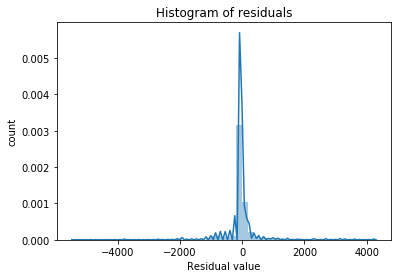

In [69]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score) 

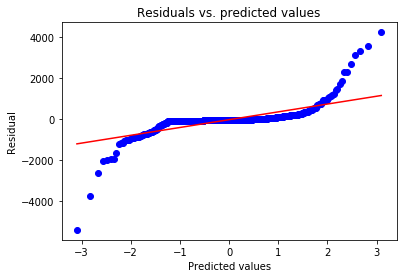

In [70]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, y_score)

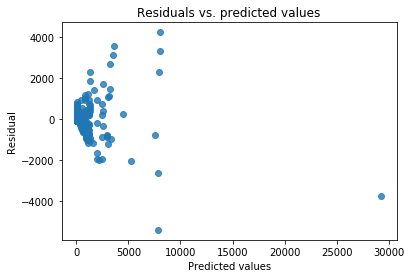

In [71]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    ##resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, y_test, fit_reg=False)
    plt.title('Actual vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, y_score) 

In [72]:
test1=pd.read_csv('test_values.csv')
test1.drop(["row_id","county_code","state"], axis=1, inplace=True)

print(test1.shape)

(2420, 45)


In [73]:
test=test1.fillna(value=0)
print(test.shape)

(2420, 45)


In [74]:
print(test['rucc'].unique())
Features_o1 = test['rucc']
enc = preprocessing.LabelEncoder()
enc.fit(Features_o1)
Features_o1 = enc.transform(Features_o1)
print(Features_o1)

['Metro - Counties in metro areas of fewer than 250,000 population'
 'Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area'
 'Metro - Counties in metro areas of 250,000 to 1 million population'
 'Nonmetro - Urban population of 20,000 or more, adjacent to a metro area'
 'Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area'
 'Metro - Counties in metro areas of 1 million population or more'
 'Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area'
 'Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area'
 'Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area']
[2 2 4 ... 7 1 2]


In [75]:
ohe = preprocessing.OneHotEncoder()
encoded = ohe.fit(Features_o1.reshape(-1,1))
Features_o1 = encoded.transform(Features_o1.reshape(-1,1)).toarray()
Features_o1[:10,:]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [76]:
def encode_string(cat_feature):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_feature.reshape(-1,1))
    return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()
    

categorical_columns = ['urban_influence', 'economic_typology',"year"]

for col in categorical_columns:
    temp = encode_string(test[col])
    Features_o1 = np.concatenate([Features_o1, temp], axis = 1)

print(Features_o1.shape)
print(Features_o1[:2, :]) 

(2420, 29)
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
  0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
  0. 0. 0. 0. 1.]]


In [77]:
Features_o1 = np.concatenate([Features_o1, np.array(test[["population", "renter_occupied_households", "pct_renter_occupied", "pct_asian","median_gross_rent", "pct_adults_bachelors_or_higher", "pct_af_am", "pct_other", "birth_rate_per_1k", "median_property_value", "homicides_per_100k", "rent_burden", "pct_hispanic", "median_household_income","pct_female", "pct_below_18_years_of_age", "pct_civilian_labor", "pct_multiple", "pct_low_birthweight", "pct_uninsured_adults", "poverty_rate", "pct_nh_pi", "pct_excessive_drinking", "pct_unemployment", "pct_adults_with_some_college", "air_pollution_particulate_matter_value", "pct_uninsured_children", "pct_am_ind", "pct_adults_less_than_a_high_school_diploma", "heart_disease_mortality_per_100k", "pct_diabetes", "pct_adult_obesity", "pop_per_primary_care_physician", "pct_adult_smoking", "pct_physical_inactivity", "pop_per_dentist", "death_rate_per_1k", "motor_vehicle_crash_deaths_per_100k", "pct_aged_65_years_and_older", "pct_white", "pct_adults_with_high_school_diploma"
]])], axis = 1)
Features_o1[:2,:]

array([[0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 1.71046000e+05, 1.73420000e+04, 2.53100000e+01,
        5.13487813e-03, 6.72000000e+02, 1.83734940e-01, 1.36739903e-01,
        3.00285271e-04, 1.22384616e+01, 9.93530000e+04, 2.90000000e+00,
        3.47380000e+01, 5.18692758e-02, 4.28280000e+04, 5.09000000e-01,
        2.39000000e-01, 4.44000000e-01, 3.13898203e-02, 9.10000000e-02,
        1.71000000e-01, 1.45720000e+01, 2.00190181e-04, 2.20000000e-01,
        5.80000000e-02, 3.57429719e-01, 1.19034745e+01, 3.900000

In [80]:
Features_reduced1 = sel.fit_transform(Features_o1)
print(Features_reduced1.shape)

(2420, 20)


In [81]:
Features1=np.array(Features_reduced1)
print(Features.shape)

(2420, 20)


In [85]:
y_score1 = ab_mod.predict(Features1)

In [86]:
print(y_score1)

[654.94565217 121.59317804  70.63585434 ...  86.02891263  86.02891263
  86.02891263]


In [87]:
np.savetxt("adaboost.csv", y_score1, delimiter=",")